In [8]:
!pip install -U scikit-learn > None # Restart environment after

In [9]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes, load_breast_cancer, make_classification, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## Переобучение & недообучение

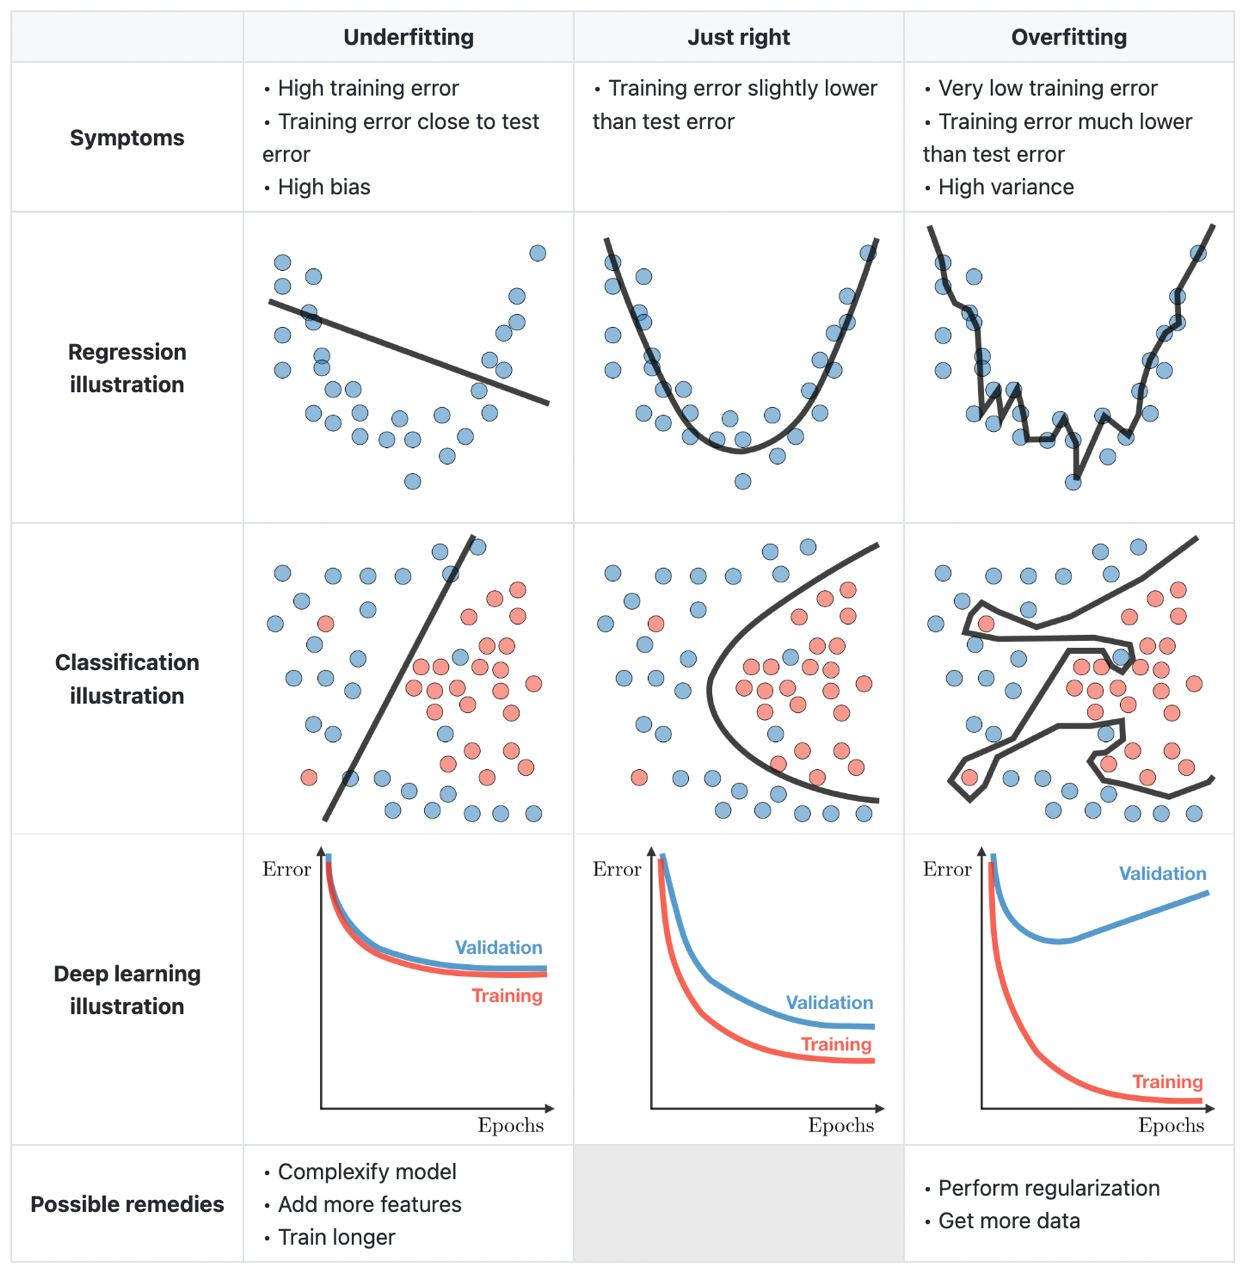

Линейные модели

## Линейная регрессия

Строя модели машинного обучения мы фактически пытаемся найти функциональную зависимость между данными и целевой переменной.

Один из видов такой зависимости является линейная зависимость

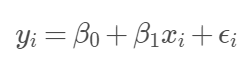

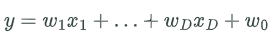

Мы хотим, чтобы на нашем датасете функция  как можно лучше приближала нашу зависимость. Для этого минимизируется MSE

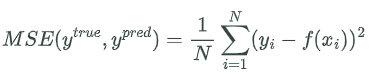


Или MAE (например, когда есть выбросы)

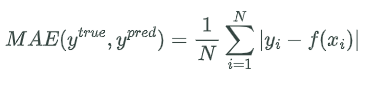

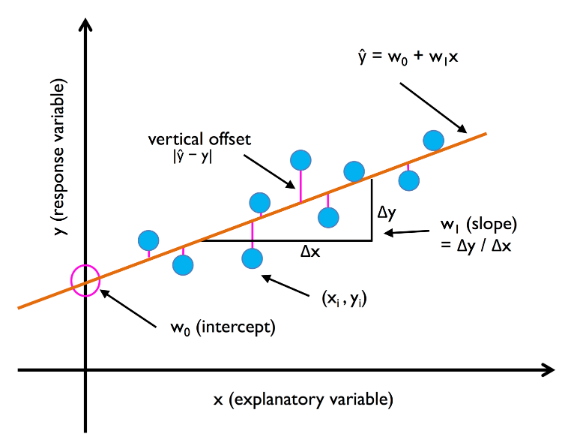

In [10]:
X, y =  load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362
409,-0.052738,0.050680,-0.011595,0.056301,0.056221,0.072902,-0.039719,0.071210,0.030564,-0.005220
55,-0.041840,-0.044642,-0.049318,-0.036656,-0.007073,-0.022608,0.085456,-0.039493,-0.066490,0.007207
157,-0.001882,0.050680,-0.033151,-0.018306,0.031454,0.042840,-0.013948,0.019917,0.010227,0.027917
70,-0.001882,-0.044642,-0.069797,-0.012556,-0.000193,-0.009143,0.070730,-0.039493,-0.062917,0.040343


In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

In [12]:
print(f'RMSE: {mean_squared_error(y_test, y_preds_lr, squared=False)}')

RMSE: 56.74617932726026


In [13]:
X_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,0.000521,-0.000005,0.001205,-0.000151,0.000917,0.000422,-0.000845,0.001105,0.002516,-0.000077
std,0.048223,0.047637,0.048400,0.047159,0.047697,0.047253,0.049024,0.047825,0.047772,0.048825
min,-0.107226,-0.044642,-0.084886,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767
25%,-0.038207,-0.044642,-0.035307,-0.034935,-0.033216,-0.031689,-0.039719,-0.039493,-0.033246,-0.034215
50%,0.005383,-0.044642,-0.006206,-0.005670,-0.002945,-0.001627,-0.010266,-0.002592,0.001148,0.003064
75%,0.038076,0.050680,0.033134,0.035076,0.027326,0.031410,0.028391,0.034309,0.035162,0.027917
max,0.110727,0.050680,0.170555,0.125158,0.153914,0.155887,0.181179,0.155345,0.133597,0.135612


Find out the age of Abalone from physical measurements

Rings - value + 1.5 gives age in years (eg. 4 = 5.5 years)

In [14]:
data = pd.read_csv('abalone.data.txt', header=None)
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'hucked_weight', 'viscera_weight', 'shell_weight', 'rings']
data.head()

,sex,length,diameter,height,whole_weight,hucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Работа с категориальными признаками

Sex (M: Male, F: Female, I: Infant)

#### Label Encoding

Применяется:

*   если признак является ординальным, т.е. значения связаны отношением порядка
*   в tree-based моделях


In [15]:
le = LabelEncoder()
le.fit_transform(data['sex'])

array([2, 2, 0, ..., 2, 0, 2])

#### One-Hot Encoding

Применяется:
 
*   в non-tree-based моделях
*   если у принака невысокая кардинальность



In [16]:
ohe = OneHotEncoder()
res = ohe.fit_transform(data['sex'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(res.toarray(), columns=ohe.get_feature_names_out())
ohe_df.head()

,x0_F,x0_I,x0_M
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [17]:
res = pd.get_dummies(data['sex'], prefix='sex', drop_first=True)
res.head()

,sex_I,sex_M
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0


In [18]:
data = pd.concat([data, res], axis=1).drop(columns='sex')
data.head()

,length,diameter,height,whole_weight,hucked_weight,viscera_weight,shell_weight,rings,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


### Мультиколлинеарность

Мультиколлинеарность — наличие линейной зависимости между объясняющими переменными (факторами) регрессионной модели. При этом различают полную коллинеарность, которая означает наличие функциональной (тождественной) линейной зависимости и частичную или просто мультиколлинеарность — наличие сильной корреляции между факторами.

Проблемы:

*   Мультиколлинеарность может стать причиной переобучаемости модели, что приведет к неверному результату
*   Оценки параметров ненадежны – получаются большие стандартные ошибки, которые меняются с изменением объема наблюдений, что делает модель регрессии непригодной для прогнозирования.



In [19]:
corrs = data.corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool))
upper_tri

,length,diameter,height,whole_weight,hucked_weight,viscera_weight,shell_weight,rings,sex_I,sex_M
length,NaN,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,-0.551465,0.236543
diameter,NaN,NaN,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,-0.564315,0.240376
height,NaN,NaN,NaN,0.819221,0.774972,0.798319,0.817338,0.557467,-0.518552,0.215459
whole_weight,NaN,NaN,NaN,NaN,0.969405,0.966375,0.955355,0.540390,-0.557592,0.252038
hucked_weight,NaN,NaN,NaN,NaN,NaN,0.931961,0.882617,0.420884,-0.521842,0.251793
viscera_weight,NaN,NaN,NaN,NaN,NaN,NaN,0.907656,0.503819,-0.556081,0.242194
shell_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627574,-0.546953,0.235391
rings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.436063,0.181831
sex_I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.522541
sex_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


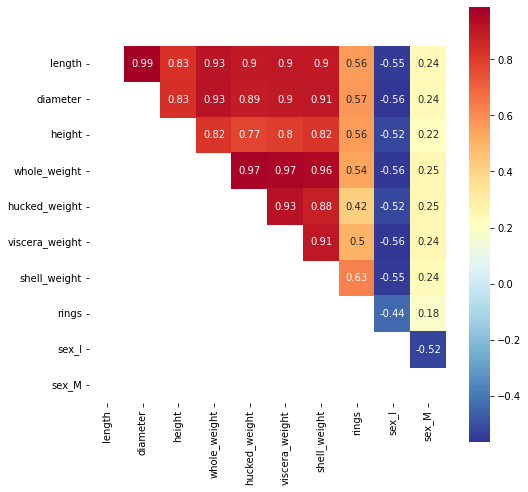

In [20]:
plt.figure(figsize=(8, 8))
sns.heatmap(upper_tri, cmap="RdYlBu_r", square=True, annot=True);

In [21]:
cols_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
cols_to_drop

['diameter', 'hucked_weight', 'viscera_weight', 'shell_weight']

In [22]:
cutted_data = data.drop(columns=cols_to_drop)
cutted_data.head()

,length,height,whole_weight,rings,sex_I,sex_M
0,0.455,0.095,0.5140,15,0,1
1,0.350,0.090,0.2255,7,0,1
2,0.530,0.135,0.6770,9,0,0
3,0.440,0.125,0.5160,10,0,1
4,0.330,0.080,0.2050,7,1,0


### Train-test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    cutted_data.drop(columns='rings'),
    cutted_data['rings'], 
    random_state=2023, 
    test_size=0.3
)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

In [25]:
print(f'RMSE: {mean_squared_error(y_test, y_preds_lr, squared=False)}')

RMSE: 2.5041378689818625


### Масштабирование

Линейные модели обучения эффективны только на признаках, которые имеют одинаковый масштаб. Поэтому масштабирование признаков это неотъемлемая часть подготовки данных перед применением методов машинного обучения. 

**Нормализация**: нормализованный набор данных всегда будет иметь значения в диапазоне от 0 до 1.

**Стандартизация**: стандартизированный набор данных будет иметь среднее значение 0 и стандартное отклонение 1

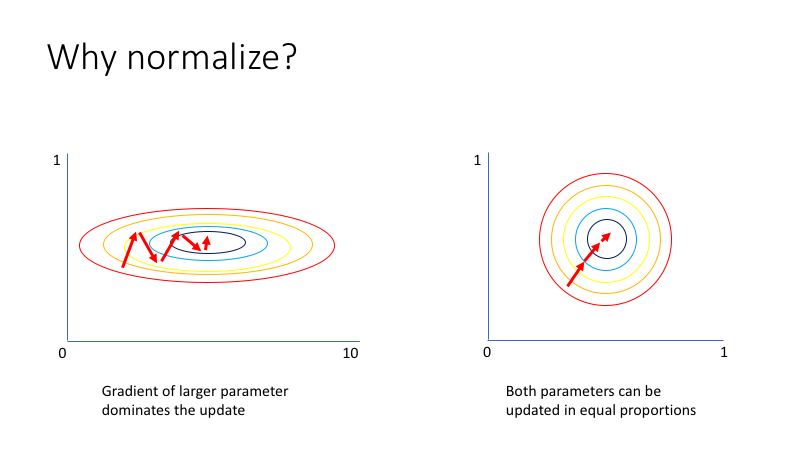

- Более быстрая сходимость алгоритма
- Масштабирование при использовании моделей с регуляризацией позволит штрафовать все признаки одинаково
- Без нормализации "вес" признака представляет собой изменение выхода на единицу изменения в предикторе

 Не существует жесткого правила, которое подскажет, когда нормализовать или стандартизировать данные.

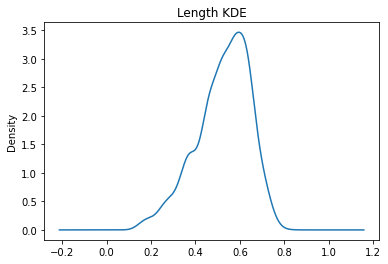

In [26]:
X_train['length'].plot.kde(title='Length KDE');

In [27]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    # на момент записи лекции здесь была строчка fit_transform,
    # что неверно, так как мы всегда обучаем scaler и тому подобные объекты
    # только на train, а затем уже применяем к test части данных метод transform!
    scaler.transform(X_test),
    columns=X_test.columns
)

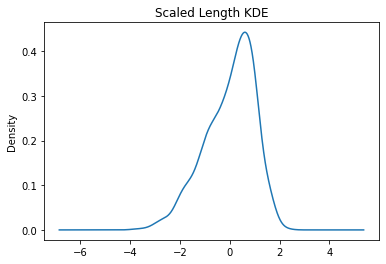

In [28]:
X_test_scaled['length'].plot.kde(title='Scaled Length KDE');

### Refit

In [29]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds_lr = lr.predict(X_test_scaled)

In [30]:
print(f'RMSE: {mean_squared_error(y_test, y_preds_lr, squared=False)}')

RMSE: 2.505477484151045


### Интерпретация

Если переменные нормализованы, мы можем интерпретировать веса в линейных моделях как важность этой переменной в прогнозируемом результате.

In [31]:
def plotCoefficients(model, columns):
    coefs = pd.DataFrame(model.coef_, columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

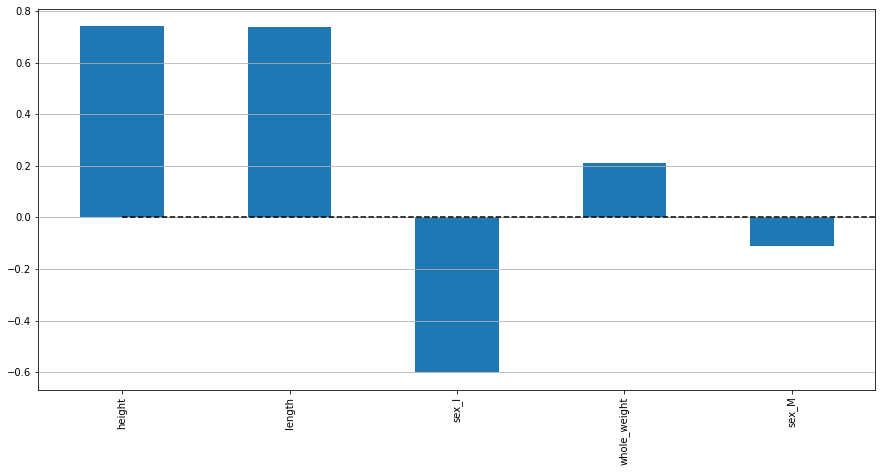

In [32]:
plotCoefficients(lr, X_train_scaled.columns)

## Линейная регрессия с регуляризацией

Для борьбы с мультиколлинеарностью и переобучением можно использовать регуляризацию - добавление дополнительных ограничений на веса признаков внутри алгоритма

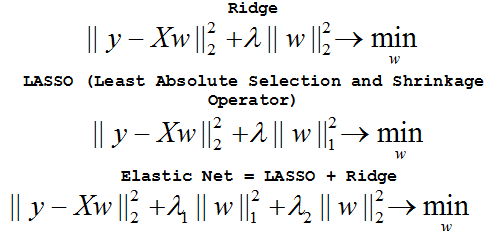

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='rings'),
    data['rings'], 
    random_state=2023, 
    test_size=0.3
)

In [34]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_preds = ridge.predict(X_test)

print(f'RMSE Ridge: {mean_squared_error(y_test, y_preds, squared=False)}')

RMSE Ridge: 2.1520038451622883


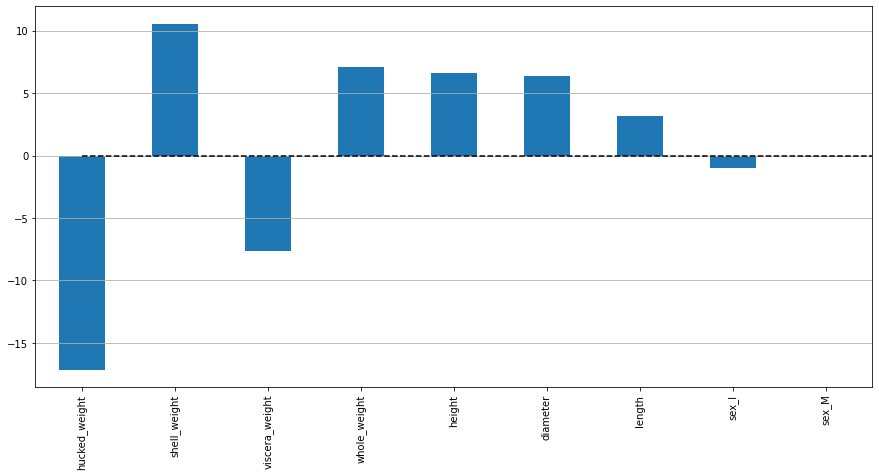

In [35]:
plotCoefficients(ridge, X_train.columns)

In [36]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_preds = lasso.predict(X_test)

print(f'RMSE Lasso: {mean_squared_error(y_test, y_preds, squared=False)}')

RMSE Lasso: 3.1105923805254267


## Логистическая регрессия

Мы можем рассматривать задачу бинарной классификации как задачу предсказания вероятности события класса 1.

Для решения этой задачи можно научить линейную модель правильно предсказывать какой-то объект, связанный с вероятностью, но с диапазоном значений ***R***, и преобразовать ответы модели в вероятность.

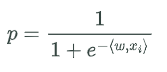

In [37]:
X, y =  load_breast_cancer(return_X_y=True, as_frame=True)
y = 1 - y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.3) 
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
311,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,...,16.46,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695
188,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,0.05780,...,12.57,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576
377,13.46,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,...,14.69,35.63,97.11,680.6,0.1108,0.14570,0.07934,0.05781,0.2694,0.07061
250,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.1211,0.31720,0.69910,0.21050,0.3126,0.07849
252,19.73,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.09740,0.1733,0.06697,...,25.28,25.59,159.80,1933.0,0.1710,0.59550,0.84890,0.25070,0.2749,0.12970


In [38]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    # на момент записи лекции здесь была строчка fit_transform,
    # что неверно, так как мы всегда обучаем scaler и тому подобные объекты
    # только на train, а затем уже применяем к test части данных метод transform!
    scaler.transform(X_test), 
    columns=X_test.columns
)

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_preds_logreg = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_preds_logreg))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.95      0.98      0.97        61

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



#### Многоклассовый случай

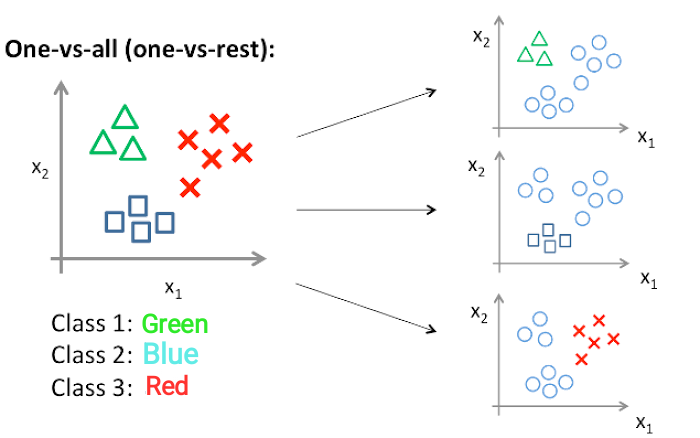

Также есть подход **One-vs-One**

In [40]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=4, random_state=2023)
model = LogisticRegression(multi_class='ovr')
model.fit(X, y)
y_preds_ovr = model.predict(X)
print(classification_report(y, y_preds_ovr))

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       251
           1       0.65      0.71      0.68       251
           2       0.71      0.76      0.73       250
           3       0.65      0.64      0.65       248

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000



## Метод k-ближайших соседей (kNN)

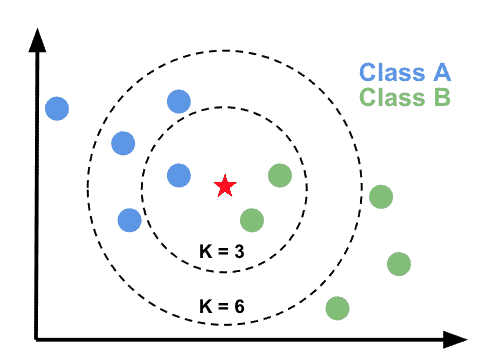

Перед применением необходима нормализация

#### Breast cancer

weights:

`uniform`: все точки взвешиваются одинаково

`distance`: вес обратен расстоянию: более близкие точки имеют большее "влияние" 

In [41]:
X, y =  load_breast_cancer(return_X_y=True, as_frame=True)
y = 1 - y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.3) 

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_preds_knn = knn.predict(X_test)
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       110
           1       0.95      0.92      0.93        61

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



#### Visualization

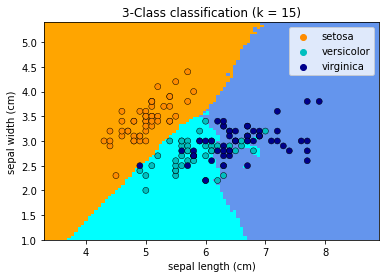

In [42]:
n_neighbors = 15

iris = load_iris()

X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

clf = KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
)

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.title(f"3-Class classification (k = {n_neighbors})")

plt.show()

## Деревья решений

Дерево решений предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил

In [43]:
iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [44]:
y_preds = clf.predict(X)
print(classification_report(y, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [45]:
import graphviz

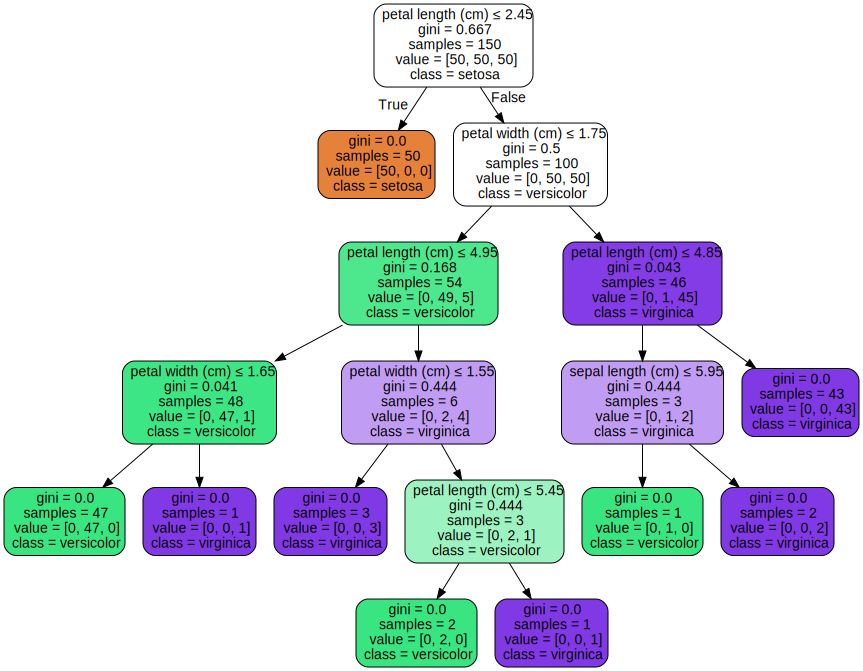

In [46]:
dot_data = export_graphviz(
  clf, out_file=None, 
  feature_names=iris.feature_names,  
  class_names=iris.target_names,  
  filled=True, rounded=True,  
  special_characters=True
)  
graph = graphviz.Source(dot_data)  
graph 

Деревья легко переобучаются

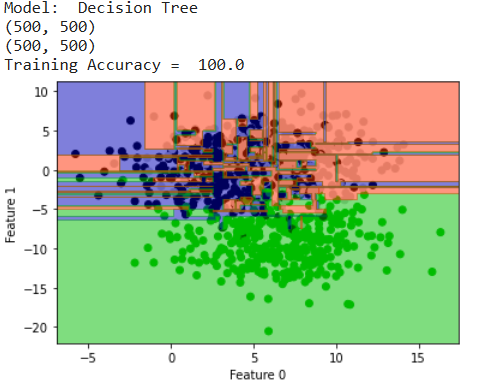